Instructions for updating:
non-resource variables are not supported in the long term
cost = 4546.876953125
cost = 136.92117309570312
cost = 419.9450988769531
cost = 3987.630615234375
cost = 5047.37939453125
cost = 844.0733032226562
cost = 4200.4072265625
cost = 4923.060546875
cost = 115.3636474609375
cost = 537.3272094726562
hidden:
kernel= [[-3.0472653  -0.38571995  0.45210737  0.30218372 -0.21493123  0.26392472
   0.05442933  0.5480888 ]]
bias =  [ -2.7659247  -7.9620123 -27.99678   -19.83065    -8.97695   -22.432613
 -21.870853  -28.54159  ]
output:
kernel= [[ -1.6101663 ]
 [ -3.976507  ]
 [ -0.61993   ]
 [  0.49597013]
 [  1.3745569 ]
 [  0.36113274]
 [-68.44214   ]
 [  0.42301795]]
bias =  [-0.60287696]


/opt/python/envs/default/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/opt/python/envs/default/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


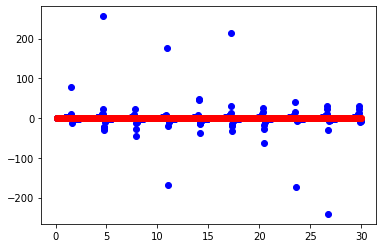

In [1]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf

tf.disable_v2_behavior() 

x_min, x_max = 0, 30 # argument range

test_data_size = 700 # amount of data
iterations = 10000 # number of teests
learn_rate = 0.01 # velocity of lerning

hiddenSize = 8 # size of hidden layer

# generation of arguments and results of target function
def generate_test_values():
    train_x = []
    train_y = []

    for _ in range(test_data_size):
        x = x_min+(x_max-x_min)*np.random.rand()
        y = math.tan(x) # исследуемая функция
        train_x.append([x])
        train_y.append([y])

    return np.array(train_x), np.array(train_y)
     # argument neuron
x = tf.placeholder(tf.float32, [None, 1], name="x")

# function neuron
y = tf.placeholder(tf.float32, [None, 1], name="y")

# скрытый слой
nn = tf.layers.dense(x, hiddenSize,
                     activation=tf.nn.sigmoid,
                     kernel_initializer=tf.initializers.ones(),
                     bias_initializer=tf.initializers.random_uniform(minval=-x_max, maxval=-x_min),
                     name="hidden")

# выходной слой
model = tf.layers.dense(nn, 1,
                        activation=None,
                        name="output")

# функция подсчёта ошибки
cost = tf.losses.mean_squared_error(y, model)

train = tf.train.GradientDescentOptimizer(learn_rate).minimize(cost)

#learning
init = tf.initializers.global_variables()

with tf.Session() as session:
    session.run(init)

    for _ in range(iterations):

        train_dataset, train_values = generate_test_values()

        session.run(train, feed_dict={
            x: train_dataset,
            y: train_values
        })

        if(_ % 1000 == 999):
            print("cost = {}".format(session.run(cost, feed_dict={
                x: train_dataset,
                y: train_values
            })))

            train_dataset, train_values = generate_test_values()

    train_values1 = session.run(model, feed_dict={
        x: train_dataset,
    })

    plt.plot(train_dataset, train_values, "bo",
             train_dataset, train_values1, "ro")
    plt.show()

    with tf.variable_scope("hidden", reuse=True):
        w = tf.get_variable("kernel")
        b = tf.get_variable("bias")
        print("hidden:")
        print("kernel=", w.eval())
        print("bias = ", b.eval())

    with tf.variable_scope("output", reuse=True):
        w = tf.get_variable("kernel")
        b = tf.get_variable("bias")
        print("output:")
        print("kernel=", w.eval())
        print("bias = ", b.eval())